In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
df["review"].drop_duplicates(inplace=True)

In [ ]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
df["review"] = df["review"].str.lower()

In [ ]:
import re

In [ ]:
def remove_html_tags(text):
    pattern = re.compile("<.*?>")
    return pattern.sub(r"",text)

In [ ]:
df["review"]=df["review"].apply(remove_html_tags)

In [ ]:
def remove_url(text):
  pattern = re.compile(r"https?://\S+|www\.\S+")
  return pattern.sub(r"",text)

In [ ]:
df["review"] = df["review"].apply(remove_url)

In [ ]:
import string

In [ ]:
exclude = string.punctuation

In [ ]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(text):
  for char in exclude:
    text = text.replace(char,"")
  return text

In [ ]:
df["review"] = df["review"].apply(remove_punc)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk

In [ ]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords_english = stopwords.words("english")

In [ ]:
def remove_stopwords(text):
  new_list=[]
  for i in text.split():
    if i in stopwords_english:
      new_list.append("")
    else:
      new_list.append(i)
  x = new_list[:]
  new_list.clear()
  return " ".join(x)

In [ ]:
df["review"] = df["review"].apply(remove_stopwords)

In [ ]:
df["review"][2]

' thought    wonderful way  spend time    hot summer weekend sitting   air conditioned theater  watching  lighthearted comedy  plot  simplistic   dialogue  witty   characters  likable even  well bread suspected serial killer   may  disappointed   realize    match point 2 risk addiction  thought   proof  woody allen  still fully  control   style many  us  grown  lovethis    id laughed  one  woodys comedies  years dare  say  decade  ive never  impressed  scarlet johanson    managed  tone   sexy image  jumped right   average  spirited young womanthis may    crown jewel   career    wittier  devil wears prada   interesting  superman  great comedy  go see  friends'

In [ ]:
df["sentiment"] = df["sentiment"].map({"negative":0,"positive":1})

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz e...,1
1,wonderful little production filming techniqu...,1
2,thought wonderful way spend time hot s...,1
3,basically theres family little boy jake thi...,0
4,petter matteis love time money visually s...,1


In [ ]:
df1 = df[:]
df1 = df1[:10000]

In [ ]:
X = df1["review"]

In [ ]:
y = df1["sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X_train_bow = tfidf.fit_transform(X_train)
X_test_bow = tfidf.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_bow,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_bow)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
accuracy_score(y_pred,y_test),precision_score(y_pred,y_test),f1_score(y_pred,y_test),recall_score(y_pred,y_test)

(0.873, 0.8934262948207171, 0.8759765625, 0.8591954022988506)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[849, 107],
       [147, 897]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train_bow,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test_bow)

In [ ]:
accuracy_score(y_pred,y_test),precision_score(y_pred,y_test),f1_score(y_pred,y_test),recall_score(y_pred,y_test)

(0.8495, 0.8336653386454184, 0.8475949367088608, 0.8619979402677652)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb = GaussianNB()

In [ ]:
tfidf1 = TfidfVectorizer(max_features=1000)

In [ ]:
X_train_bow_gb = tfidf1.fit_transform(X_train).toarray()
X_test_bow_gb = tfidf1.transform(X_test).toarray()

In [ ]:
gb.fit(X_train_bow_gb,y_train)

GaussianNB()

In [ ]:
y_pred = gb.predict(X_test_bow_gb)

In [ ]:
accuracy_score(y_pred,y_test),precision_score(y_pred,y_test),f1_score(y_pred,y_test),recall_score(y_pred,y_test)

(0.8055, 0.8117529880478087, 0.8073303615651313, 0.8029556650246306)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train_bow,y_train)

SVC()

In [ ]:
y_pred = svc.predict(X_test_bow)

In [ ]:
accuracy_score(y_pred,y_test),precision_score(y_pred,y_test),f1_score(y_pred,y_test),recall_score(y_pred,y_test)

(0.8775, 0.901394422310757, 0.8807785888077859, 0.8610846812559467)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svc, X_train_bow, y_train, cv=kf, scoring='accuracy')
cv_scores.mean()

np.float64(0.87225)

In [ ]:
y_pred = svc.predict(X_test_bow)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [ ]:
roc_auc_score(y_pred,y_test)

np.float64(0.8783821720294486)

In [ ]:
accuracy_score(y_pred,y_test),precision_score(y_pred,y_test),recall_score(y_pred,y_test),f1_score(y_pred,y_test)

(0.8775, 0.901394422310757, 0.8610846812559467, 0.8807785888077859)

In [ ]:
df2 = df[:]
df2 = df2[20000:30000]

In [ ]:
sample_text = df2["review"]

In [ ]:
X_train_bow = tfidf.fit_transform(X_train)
sample_text_bow = tfidf.transform(sample_text)

In [ ]:
predictions = svc.predict(sample_text_bow)

In [ ]:
actual_values = df2["sentiment"]

In [ ]:
accuracy_score(predictions,actual_values),precision_score(predictions,actual_values),confusion_matrix(predictions,actual_values)

(0.8762,
 0.8959311424100157,
 array([[4182,  532],
        [ 706, 4580]]))

In [ ]:
import joblib

In [ ]:
joblib.dump(svc,"model.pkl")

['model.pkl']

In [ ]:
joblib.dump(tfidf,"tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [ ]:
final = pd.DataFrame(predictions)

In [ ]:
final.to_csv("predictions.csv",index=False)

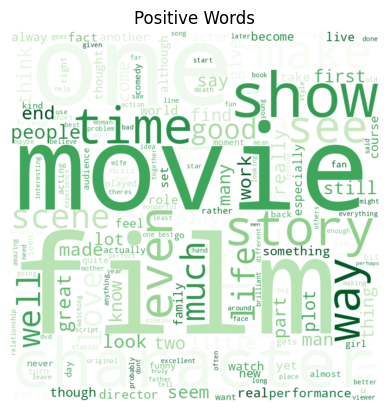

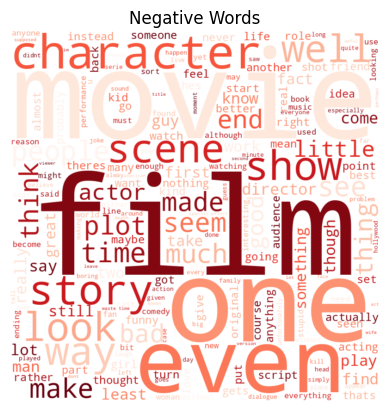

In [ ]:
from wordcloud import WordCloud

positive_text = " ".join(df[df['sentiment'] == 1]["review"])
negative_text = " ".join(df[df['sentiment'] == 0]["review"])

pos_wc = WordCloud(width=800, height=800, background_color='white', colormap='Greens').generate(positive_text)
neg_wc = WordCloud(width=800, height=800, background_color='white', colormap='Reds').generate(negative_text)

plt.imshow(pos_wc, interpolation='bilinear')
plt.title("Positive Words")
plt.axis("off")
plt.show()

plt.imshow(neg_wc, interpolation='bilinear')
plt.title("Negative Words")
plt.axis("off")
plt.show()

In [ ]:
def predict_sentiment(text):
  text = text.lower()
  text = remove_html_tags(text)
  text = remove_url(text)
  text = remove_punc(text)
  text = remove_stopwords(text)
  model = joblib.load("model.pkl")
  tfidf = joblib.load("tfidf_vectorizer.pkl")
  text_bow = tfidf.transform([text])
  prediction = svc.predict(text_bow)
  if prediction == 1:
    print(f"The review: {text} is positive")
  else:
    print(f"The review: {text} is negative")



In [ ]:
print(predict_sentiment(input("Enter a review:")))

Enter a review:Terrible plot and acting
The review: terrible plot  acting is negative
None
